In [304]:
import pandas as pd

In [305]:
df = pd.read_csv("telecom_churn.csv")

In [306]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [307]:
df.shape

(3333, 11)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [309]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [310]:
#有無缺失值
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

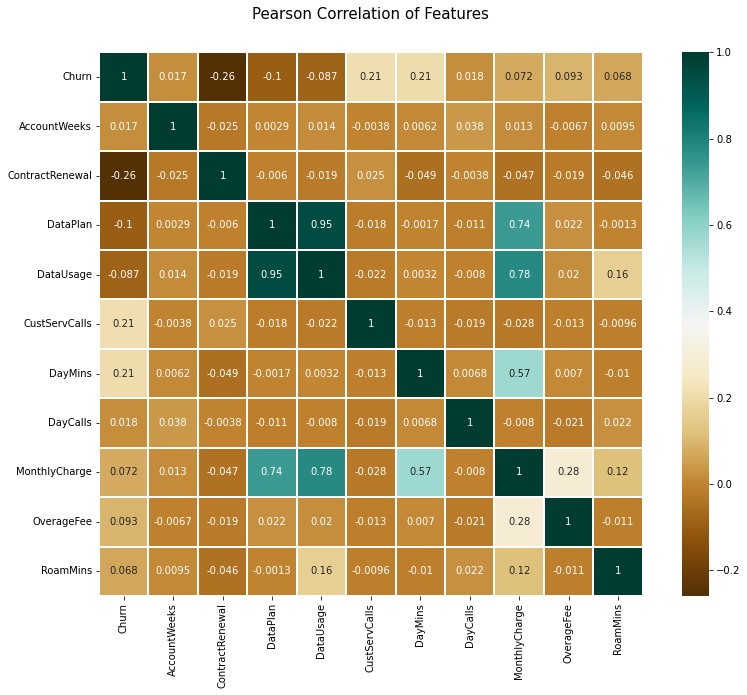

In [311]:
plt.figure(figsize=(14, 10))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG", linewidths=0.1, square=True, linecolor='white', annot=True)

In [312]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [93]:
#要將資料分群，現在0跟1不對等，在測試資料上，包含0跟1的資料筆數要對等

In [313]:
df_1 = df[df['Churn']==1]

In [314]:
df_0 = df[df['Churn']==0]

In [315]:
valid_test_1 = df_1.sample(n=160, random_state=200)
valid_test_0 = df_0.sample(n=160, random_state=200)

In [316]:
valid_1 = valid_test_1[:80]
test_1 = valid_test_1[80:]

In [317]:
valid_0 = valid_test_0[:80]
test_0 = valid_test_0[80:]

In [318]:
valid_1.shape

(80, 11)

In [319]:
train = df.drop(valid_1.index)
train = train.drop(test_1.index)
train = train.drop(valid_0.index)
train = train.drop(test_0.index)

In [320]:
train.shape

(3013, 11)

In [321]:
valid = pd.concat([valid_1, valid_0], axis=0)
valid.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3127,1,100,1,0,0.00,4,113.3,96,37.0,9.90,11.7
1866,1,119,1,0,0.00,2,81.9,75,36.0,12.69,8.9
2724,1,182,1,0,0.00,2,279.1,124,63.0,9.03,9.5
1718,1,109,0,0,0.00,2,268.4,85,59.0,7.53,9.7
372,1,151,0,0,0.29,0,218.0,57,49.9,5.72,12.4


In [322]:
test = pd.concat([test_1, test_0], axis=0)
test.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1392,1,101,1,0,0.00,3,269.7,85,64.0,10.38,4.5
1965,1,139,1,0,0.00,1,236.6,109,55.0,8.50,11.1
2735,1,90,0,1,3.59,0,169.0,104,80.9,9.44,13.3
2594,1,115,0,0,0.00,1,345.3,81,76.0,10.17,11.8
2267,1,29,1,0,0.00,2,313.2,103,72.0,10.82,12.8


normalize資料，用z-score來normailize，AccountWeeks, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins

In [323]:
from scipy import stats


train['AccountWeeks'] = stats.zscore(train['AccountWeeks'])
train['DataUsage'] = stats.zscore(train['DataUsage'])
train['CustServCalls'] = stats.zscore(train['CustServCalls'])
train['DayMins'] = stats.zscore(train['DayMins'])
train['DayCalls'] = stats.zscore(train['DayCalls'])
train['MonthlyCharge'] = stats.zscore(train['MonthlyCharge'])
train['OverageFee'] = stats.zscore(train['OverageFee'])
train['RoamMins'] = stats.zscore(train['RoamMins'])

In [324]:
valid['AccountWeeks'] = stats.zscore(valid['AccountWeeks'])
valid['DataUsage'] = stats.zscore(valid['DataUsage'])
valid['CustServCalls'] = stats.zscore(valid['CustServCalls'])
valid['DayMins'] = stats.zscore(valid['DayMins'])
valid['DayCalls'] = stats.zscore(valid['DayCalls'])
valid['MonthlyCharge'] = stats.zscore(valid['MonthlyCharge'])
valid['OverageFee'] = stats.zscore(valid['OverageFee'])
valid['RoamMins'] = stats.zscore(valid['RoamMins'])

In [325]:
test['AccountWeeks'] = stats.zscore(test['AccountWeeks'])
test['DataUsage'] = stats.zscore(test['DataUsage'])
test['CustServCalls'] = stats.zscore(test['CustServCalls'])
test['DayMins'] = stats.zscore(test['DayMins'])
test['DayCalls'] = stats.zscore(test['DayCalls'])
test['MonthlyCharge'] = stats.zscore(test['MonthlyCharge'])
test['OverageFee'] = stats.zscore(test['OverageFee'])
test['RoamMins'] = stats.zscore(test['RoamMins'])

In [326]:
valid_churn = valid['Churn']
valid = valid.drop(['Churn'], axis=1)

In [327]:
test_churn = test['Churn']
test = test.drop(['Churn'], axis=1)

In [329]:
churn = train['Churn']
train = train.drop(['Churn'], axis=1)

建立模型: 建立decision tree跟random forest

In [347]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
clfd = clf.fit(train, churn)

In [348]:
from sklearn.metrics import accuracy_score

predict_d_train = clfd.predict(train)
print("Train正確率: ", accuracy_score(churn, predict_d_train) * 100, "%")

predict_d_valid = clfd.predict(valid)
print("Valid正確率: ", accuracy_score(valid_churn, predict_d_valid) * 100, "%")

predict_d_test = clfd.predict(test)
print("Test正確率: ", accuracy_score(test_churn, predict_d_test) * 100, "%")

Train正確率:  100.0 %
Valid正確率:  56.875 %
Test正確率:  59.375 %


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        80
           1       1.00      0.19      0.32        80

    accuracy                           0.59       160
   macro avg       0.78      0.59      0.51       160
weighted avg       0.78      0.59      0.51       160



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


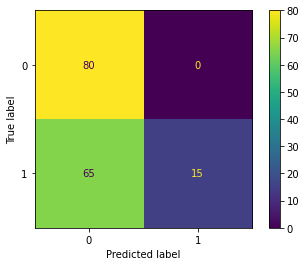

In [332]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


print(classification_report(test_churn, predict_d_test))
plot_confusion_matrix(clfd, test, test_churn)

In [342]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators=100, max_depth=10)
clfr = clfr.fit(train, churn)

In [349]:
predict_r_train = clfr.predict(train)
print("Train正確率: ", accuracy_score(churn, predict_r_train) * 100, "%")

predict_r_valid = clfr.predict(valid)
print("Valid正確率: ", accuracy_score(valid_churn, predict_r_valid) * 100, "%")

predict_r_test = clfr.predict(test)
print("Test正確率: ", accuracy_score(test_churn, predict_r_test) * 100, "%")

Train正確率:  97.97543976103552 %
Valid正確率:  65.625 %
Test正確率:  69.375 %


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        80
           1       1.00      0.39      0.56        80

    accuracy                           0.69       160
   macro avg       0.81      0.69      0.66       160
weighted avg       0.81      0.69      0.66       160



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


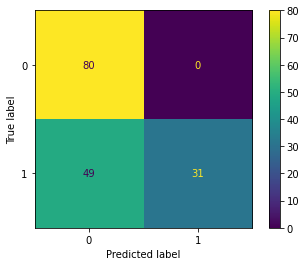

In [344]:
print(classification_report(test_churn, predict_r_test))
plot_confusion_matrix(clfr, test, test_churn)

Gradient Boosting

Train正確率:  95.25389976767342 %
Valid正確率:  65.0 %
Test正確率:  68.125 %
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        80
           1       1.00      0.36      0.53        80

    accuracy                           0.68       160
   macro avg       0.81      0.68      0.65       160
weighted avg       0.81      0.68      0.65       160



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


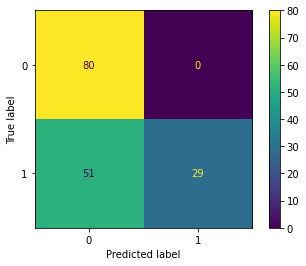

In [350]:
from sklearn.ensemble import GradientBoostingClassifier

clfg = GradientBoostingClassifier(n_estimators=100, max_depth=2)
clfg.fit(train, churn)

predict_g_train = clfg.predict(train)
print("Train正確率: ", accuracy_score(churn, predict_g_train) * 100, "%")
predict_g_valid = clfg.predict(valid)
print("Valid正確率: ", accuracy_score(valid_churn, predict_g_valid) * 100, "%")
predict_g_test = clfg.predict(test)
print("Test正確率: ", accuracy_score(test_churn, predict_g_test) * 100, "%")

print(classification_report(test_churn, predict_g_test))
plot_confusion_matrix(clfg, test, test_churn)

KNN

Train正確率:  100.0 %
Valid正確率:  58.12500000000001 %
Test正確率:  63.125 %
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        80
           1       1.00      0.26      0.42        80

    accuracy                           0.63       160
   macro avg       0.79      0.63      0.57       160
weighted avg       0.79      0.63      0.57       160



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


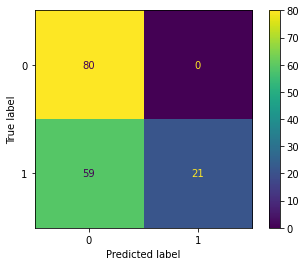

In [351]:
from sklearn.neighbors import KNeighborsClassifier

clfk = KNeighborsClassifier(n_neighbors=4, weights='distance')
clfk.fit(train, churn)

predict_k_train = clfk.predict(train)
print("Train正確率: ", accuracy_score(churn, predict_k_train) * 100, "%")

predict_k_valid = clfk.predict(valid)
print("Valid正確率: ", accuracy_score(valid_churn, predict_k_valid) * 100, "%")

predict_k_test = clfk.predict(test)
print("Test正確率: ", accuracy_score(test_churn, predict_k_test) * 100, "%")


print(classification_report(test_churn, predict_k_test))
plot_confusion_matrix(clfk, test, test_churn)

In [360]:
p1 = clfd.predict_proba(test)
p2 = clfr.predict_proba(test)
p3 = clfg.predict_proba(test)
p4 = clfk.predict_proba(test)

In [361]:
print(p1.shape)
print(p1[0])

(160, 2)
[0.82178191 0.17821809]


In [362]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [364]:
auc_score_1 = roc_auc_score(test_churn, p1[:, 1])
auc_score_2 = roc_auc_score(test_churn, p2[:, 1])
auc_score_3 = roc_auc_score(test_churn, p3[:, 1])
auc_score_4 = roc_auc_score(test_churn, p4[:, 1])

print(auc_score_1, auc_score_2, auc_score_3, auc_score_4)

0.7773437500000001 0.8814062500000001 0.8753906249999999 0.772890625


In [365]:
fpr_1, tpr_1, _ = roc_curve(test_churn, p1[:, 1], pos_label=1)
fpr_2, tpr_2, _ = roc_curve(test_churn, p2[:, 1], pos_label=1)
fpr_3, tpr_3, _ = roc_curve(test_churn, p3[:, 1], pos_label=1)
fpr_4, tpr_4, _ = roc_curve(test_churn, p4[:, 1], pos_label=1)


In [366]:
random_probs = [0 for i in range(len(test_churn))]
p_fpr, p_tpr, _ = roc_curve(test_churn, random_probs, pos_label=1)
print(p_fpr, p_tpr)

[0. 1.] [0. 1.]


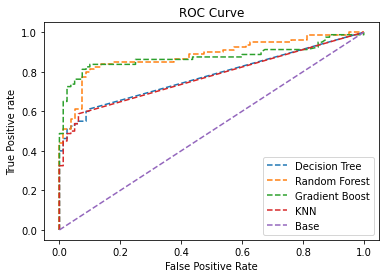

In [367]:
plt.plot(fpr_1, tpr_1, linestyle='--', label='Decision Tree')
plt.plot(fpr_2, tpr_2, linestyle='--', label='Random Forest')
plt.plot(fpr_3, tpr_3, linestyle='--', label='Gradient Boost')
plt.plot(fpr_4, tpr_4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', label='Base')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()

修改模型

In [ ]:
#在EDA中，有分成兩個Segment並看到一些規律，嘗試將資料分成兩種，用兩個模型來預測

In [369]:
valid_df = pd.concat([valid_1, valid_0], axis=0)
test_df = pd.concat([test_1, test_0], axis=0)

In [370]:
train_df = df.drop(valid.index)
train_df = train_df.drop(test.index)

In [371]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(3013, 11)
(160, 11)
(160, 11)


In [372]:
train_df_seg1 = train_df[train_df["DataUsage"] <= 1]
train_df_seg2 = train_df[train_df["DataUsage"] > 1]


In [373]:
valid_df_seg1 = valid_df[valid_df["DataUsage"] <= 1]
valid_df_seg2 = valid_df[valid_df["DataUsage"] > 1]

In [374]:
test_df_seg1 = test_df[test_df["DataUsage"] <= 1]
test_df_seg2 = test_df[test_df["DataUsage"] > 1]

In [375]:
print(train_df_seg1.shape)
print(train_df_seg2.shape)

(2169, 11)
(844, 11)


In [376]:
print(valid_df_seg1.shape)
print(valid_df_seg2.shape)

(127, 11)
(33, 11)


In [377]:
print(test_df_seg1.shape)
print(test_df_seg2.shape)

(124, 11)
(36, 11)


In [378]:
churn_seg1 = train_df_seg1["Churn"]
churn_seg2 = train_df_seg2["Churn"]

train_seg1 = train_df_seg1.drop(["Churn"], axis=1)
train_seg2 = train_df_seg2.drop(["Churn"], axis=1)

In [379]:
valid_churn_seg1 = valid_df_seg1["Churn"]
valid_churn_seg2 = valid_df_seg2["Churn"]

valid_seg1 = valid_df_seg1.drop(["Churn"], axis=1)
valid_seg2 = valid_df_seg2.drop(["Churn"], axis=1)

In [380]:
test_churn_seg1 = test_df_seg1["Churn"]
test_churn_seg2 = test_df_seg2["Churn"]

test_seg1 = test_df_seg1.drop(["Churn"], axis=1)
test_seg2 = test_df_seg2.drop(["Churn"], axis=1)

In [256]:
train_seg1['AccountWeeks'] = stats.zscore(train_seg1['AccountWeeks'])
train_seg1['DataUsage'] = stats.zscore(train_seg1['DataUsage'])
train_seg1['CustServCalls'] = stats.zscore(train_seg1['CustServCalls'])
train_seg1['DayMins'] = stats.zscore(train_seg1['DayMins'])
train_seg1['DayCalls'] = stats.zscore(train_seg1['DayCalls'])
train_seg1['MonthlyCharge'] = stats.zscore(train_seg1['MonthlyCharge'])
train_seg1['OverageFee'] = stats.zscore(train_seg1['OverageFee'])
train_seg1['RoamMins'] = stats.zscore(train_seg1['RoamMins'])

In [257]:
train_seg2['AccountWeeks'] = stats.zscore(train_seg2['AccountWeeks'])
train_seg2['DataUsage'] = stats.zscore(train_seg2['DataUsage'])
train_seg2['CustServCalls'] = stats.zscore(train_seg2['CustServCalls'])
train_seg2['DayMins'] = stats.zscore(train_seg2['DayMins'])
train_seg2['DayCalls'] = stats.zscore(train_seg2['DayCalls'])
train_seg2['MonthlyCharge'] = stats.zscore(train_seg2['MonthlyCharge'])
train_seg2['OverageFee'] = stats.zscore(train_seg2['OverageFee'])
train_seg2['RoamMins'] = stats.zscore(train_seg2['RoamMins'])

In [252]:
valid_seg1['AccountWeeks'] = stats.zscore(valid_seg1['AccountWeeks'])
valid_seg1['DataUsage'] = stats.zscore(valid_seg1['DataUsage'])
valid_seg1['CustServCalls'] = stats.zscore(valid_seg1['CustServCalls'])
valid_seg1['DayMins'] = stats.zscore(valid_seg1['DayMins'])
valid_seg1['DayCalls'] = stats.zscore(valid_seg1['DayCalls'])
valid_seg1['MonthlyCharge'] = stats.zscore(valid_seg1['MonthlyCharge'])
valid_seg1['OverageFee'] = stats.zscore(valid_seg1['OverageFee'])
valid_seg1['RoamMins'] = stats.zscore(valid_seg1['RoamMins'])

In [253]:
valid_seg2['AccountWeeks'] = stats.zscore(valid_seg2['AccountWeeks'])
valid_seg2['DataUsage'] = stats.zscore(valid_seg2['DataUsage'])
valid_seg2['CustServCalls'] = stats.zscore(valid_seg2['CustServCalls'])
valid_seg2['DayMins'] = stats.zscore(valid_seg2['DayMins'])
valid_seg2['DayCalls'] = stats.zscore(valid_seg2['DayCalls'])
valid_seg2['MonthlyCharge'] = stats.zscore(valid_seg2['MonthlyCharge'])
valid_seg2['OverageFee'] = stats.zscore(valid_seg2['OverageFee'])
valid_seg2['RoamMins'] = stats.zscore(valid_seg2['RoamMins'])

In [381]:
test_seg1['AccountWeeks'] = stats.zscore(test_seg1['AccountWeeks'])
test_seg1['DataUsage'] = stats.zscore(test_seg1['DataUsage'])
test_seg1['CustServCalls'] = stats.zscore(test_seg1['CustServCalls'])
test_seg1['DayMins'] = stats.zscore(test_seg1['DayMins'])
test_seg1['DayCalls'] = stats.zscore(test_seg1['DayCalls'])
test_seg1['MonthlyCharge'] = stats.zscore(test_seg1['MonthlyCharge'])
test_seg1['OverageFee'] = stats.zscore(test_seg1['OverageFee'])
test_seg1['RoamMins'] = stats.zscore(test_seg1['RoamMins'])

In [382]:
test_seg2['AccountWeeks'] = stats.zscore(test_seg2['AccountWeeks'])
test_seg2['DataUsage'] = stats.zscore(test_seg2['DataUsage'])
test_seg2['CustServCalls'] = stats.zscore(test_seg2['CustServCalls'])
test_seg2['DayMins'] = stats.zscore(test_seg2['DayMins'])
test_seg2['DayCalls'] = stats.zscore(test_seg2['DayCalls'])
test_seg2['MonthlyCharge'] = stats.zscore(test_seg2['MonthlyCharge'])
test_seg2['OverageFee'] = stats.zscore(test_seg2['OverageFee'])
test_seg2['RoamMins'] = stats.zscore(test_seg2['RoamMins'])

In [383]:
clfr_seg1 = RandomForestClassifier(n_estimators=100, max_depth=10)
clfr_seg1 = clfr_seg1.fit(train_seg1, churn_seg1)


Train正確率:  98.01751959428307 %
Valid正確率:  81.88976377952756 %
Test正確率:  60.483870967741936 %
              precision    recall  f1-score   support

           0       0.54      0.89      0.68        57
           1       0.80      0.36      0.49        67

    accuracy                           0.60       124
   macro avg       0.67      0.63      0.59       124
weighted avg       0.68      0.60      0.58       124



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


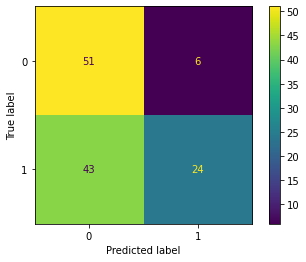

In [385]:
predict_train_seg1 = clfr_seg1.predict(train_seg1)
print("Train正確率: ", accuracy_score(churn_seg1, predict_train_seg1) * 100, "%")

predict_valid_seg1 = clfr_seg1.predict(valid_seg1)
print("Valid正確率: ", accuracy_score(valid_churn_seg1, predict_valid_seg1) * 100, "%")

predict_test_seg1 = clfr_seg1.predict(test_seg1)
print("Test正確率: ", accuracy_score(test_churn_seg1, predict_test_seg1) * 100, "%")

print(classification_report(test_churn_seg1, predict_test_seg1))
plot_confusion_matrix(clfr_seg1, test_seg1, test_churn_seg1)

In [260]:
clfr_seg2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clfr_seg2 = clfr_seg2.fit(train_seg2, churn_seg2)

predict_seg2 = clfr_seg2.predict(valid_seg2)

Train正確率:  59.12322274881517 %
Valid正確率:  66.66666666666666 %
Test正確率:  80.55555555555556 %
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      0.46      0.63        13

    accuracy                           0.81        36
   macro avg       0.88      0.73      0.75        36
weighted avg       0.85      0.81      0.78        36



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


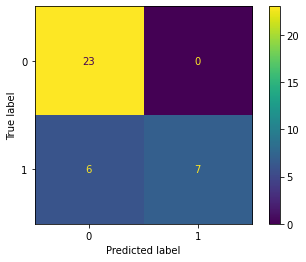

In [386]:
predict_train_seg2 = clfr_seg2.predict(train_seg2)
print("Train正確率: ", accuracy_score(churn_seg2, predict_train_seg2) * 100, "%")

predict_valid_seg2 = clfr_seg1.predict(valid_seg2)
print("Valid正確率: ", accuracy_score(valid_churn_seg2, predict_valid_seg2) * 100, "%")

predict_test_seg2 = clfr_seg1.predict(test_seg2)
print("Test正確率: ", accuracy_score(test_churn_seg2, predict_test_seg2) * 100, "%")

print(classification_report(test_churn_seg2, predict_test_seg2))
plot_confusion_matrix(clfr_seg2, test_seg2, test_churn_seg2)

準確率從69.38% 變成65.625%

將訓練資料中的churn比例調整成一樣

In [387]:
print(train_df.shape)

(3013, 11)


In [390]:
train_df['Churn'].value_counts()

0    2690
1     323
Name: Churn, dtype: int64

In [391]:
train_df_1 = train_df[train_df["Churn"]==1]
train_df_0 = train_df[train_df["Churn"]==0].sample(323)

In [392]:
churn_0 = train_df_0["Churn"]
churn_1 = train_df_1["Churn"]

train_0 = train_df_0.drop(["Churn"], axis=1)
train_1 = train_df_1.drop(["Churn"], axis=1)

In [393]:
train_bal = pd.concat([train_0, train_1], axis=0)
churn_bal = pd.concat([churn_0, churn_1], axis=0)

In [394]:
train_bal['AccountWeeks'] = stats.zscore(train_bal['AccountWeeks'])
train_bal['DataUsage'] = stats.zscore(train_bal['DataUsage'])
train_bal['CustServCalls'] = stats.zscore(train_bal['CustServCalls'])
train_bal['DayMins'] = stats.zscore(train_bal['DayMins'])
train_bal['DayCalls'] = stats.zscore(train_bal['DayCalls'])
train_bal['MonthlyCharge'] = stats.zscore(train_bal['MonthlyCharge'])
train_bal['OverageFee'] = stats.zscore(train_bal['OverageFee'])
train_bal['RoamMins'] = stats.zscore(train_bal['RoamMins'])

In [395]:
clfr_2= RandomForestClassifier(n_estimators=100, max_depth=10)
clfr_2 = clfr_2.fit(train_bal, churn_bal)


Train正確率:  96.59442724458205 %
正確率:  81.875 %
正確率:  90.0 %
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        80
           1       0.91      0.89      0.90        80

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


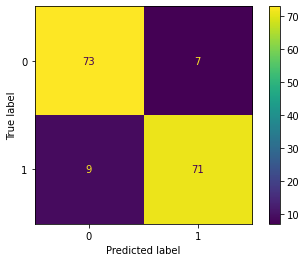

In [396]:
predict_clfr_2 = clfr_2.predict(train_bal)
print("Train正確率: ", accuracy_score(churn_bal, predict_clfr_2) * 100, "%")

predict_clfr_valid_2 = clfr_2.predict(valid)
print("正確率: ", accuracy_score(valid_churn, predict_clfr_valid_2) * 100, "%")

predict_clfr_test_2 = clfr_2.predict(test)
print("正確率: ", accuracy_score(test_churn, predict_clfr_test_2) * 100, "%")
print(classification_report(test_churn, predict_clfr_test_2))
plot_confusion_matrix(clfr_2, test, test_churn)

In [291]:
train_bal = pd.concat([train_0, train_1], axis=0)
churn_bal = pd.concat([churn_0, churn_1], axis=0)

In [296]:
train_bal.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
854,120,1,1,2.62,2,212.7,73,85.2,12.88,9.7
647,88,1,0,0.00,1,192.0,91,44.0,6.38,7.5
433,78,1,0,0.00,2,155.0,106,42.0,8.77,11.8
2850,109,1,0,0.00,2,137.0,128,42.0,10.85,10.0
20,147,1,0,0.31,0,155.1,117,50.1,11.99,10.6


準確率從65.0 % 變成80.0%

In [289]:
valid_ori = pd.concat([valid_1, valid_0], axis=0)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3127,1,100,1,0,0.00,4,113.3,96,37.0,9.90,11.7
1866,1,119,1,0,0.00,2,81.9,75,36.0,12.69,8.9
2724,1,182,1,0,0.00,2,279.1,124,63.0,9.03,9.5
1718,1,109,0,0,0.00,2,268.4,85,59.0,7.53,9.7
372,1,151,0,0,0.29,0,218.0,57,49.9,5.72,12.4


In [290]:
test_ori = pd.concat([test_1, test_0], axis=0)
test_ori.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1392,1,101,1,0,0.00,3,269.7,85,64.0,10.38,4.5
1965,1,139,1,0,0.00,1,236.6,109,55.0,8.50,11.1
2735,1,90,0,1,3.59,0,169.0,104,80.9,9.44,13.3
2594,1,115,0,0,0.00,1,345.3,81,76.0,10.17,11.8
2267,1,29,1,0,0.00,2,313.2,103,72.0,10.82,12.8


In [292]:
valid_ori_churn = valid_ori['Churn']
valid_ori = valid_ori.drop(['Churn'], axis=1)

In [293]:
test_ori_churn = test_ori['Churn']
test_ori = test_ori.drop(['Churn'], axis=1)

In [301]:
clfr_3= RandomForestClassifier(n_estimators=100, max_depth=10)
clfr_3 = clfr_3.fit(train_bal, churn_bal)

predict_clfr_3 = clfr_3.predict(valid_ori)

In [303]:
#training 準確率
predict_clfr_3 = clfr_3.predict(train_bal)
print("正確率: ", accuracy_score(churn_bal, predict_clfr_3) * 100, "%")

正確率:  97.52321981424149 %


正確率:  80.625 %
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        80
           1       0.80      0.81      0.81        80

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


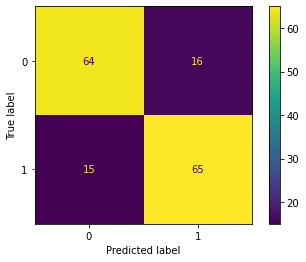

In [302]:
print("正確率: ", accuracy_score(valid_ori_churn, predict_clfr_3) * 100, "%")
print(classification_report(valid_ori_churn, predict_clfr_3))
plot_confusion_matrix(clfr_3, valid_ori, valid_ori_churn)

In [41]:
# #找出outlier
# import numpy as np
# from scipy import stats


# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [48]:
# for column in df.columns:
#     print(column)
#     df_column = df[np.abs(stats.zscore(df[str(column)])) > 3]
#     print(list(df_column[str(column)]))
#     print(len(df_column))
    

Churn
[]
0
AccountWeeks
[224, 243, 232, 225, 225, 224, 221]
7
ContractRenewal
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 